In [16]:
from equadratures import *
from equadratures.datasets import score
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
from matplotlib import cm, rcParams
from joblib import dump, load
from funcs import grid_within_hull, mean_std_X

%matplotlib notebook

In this notebook, we use the Effective Quadratures python package to obtain subspaces for the three design objectives examined in the paper. We assume that a grid search has already been performed to find suitable polynomial orders $k$ and number of reduced dimensions $m$ (see the "grid_search" notebook).

## Load the data
There are $N=128$ designs and $d=7$ design parameters. The input design vectors are stored in $\mathbf{X}\in \mathbb{R}^{N\times d}$, while the three design objectives are stored in $y_1,y_2,y_3 \in \mathbb{R}^{N \times 1}$.

The design objectives are the following (see Sections 2 and 6 in the paper for more details):
1) $y_1$: Stagnation pressure loss coefficient $Y_p$ averaged across the Mach number range. 

2) $y_2$: Gradient of recovery ratio w.r.t to Mach number $\partial R_r/\partial M$.

3) $y_3$: Recovery ratio $R_r$ at Mach 0.8. 

As in the paper, $X$ is standardised to lie within the interval $[-1,1]$. Unlike in the paper, for commerical privacy reasons, $y_1$, $y_2$ and $y_3$ are also standarised here. 

In [17]:
X = np.load('../Data/X.npy')
y1 = np.load('../Data/y1.npy')
y2 = np.load('../Data/y2.npy')
y3 = np.load('../Data/y3.npy')
nrow, dim = np.shape(X)
print('Number of designs = %d, Number of design parameters = %d' %(nrow,dim))
Xheader = ['Hole $\oslash$','Kiel $\oslash_{inner}$','Kiel $\oslash_{outer}$','Kiel lip fwd/back','Hole angle','Hole fwd/back','Hole ellipse'] 

Number of designs = 128, Number of design parameters = 7


## Find a subspace for loss coefficient
Here we find a subspace for the loss coefficient design objective $y_1$ ($O_{Yp}$ in the paper). From a previous grid search, we know a 1D subspace ($m=1$) and $1^{st}$ order polynomial ($k=1$) are suitable.

The subspace procedure is not deterministic (there is an element of randomness involved). Sometimes poor subspaces are obtained. We can judge by looking at $R^2$ or simply plotting the summary plot (see later). In this event we simply rerun until we find a subspace we are happy with. This does mean that it is good practice to save a subspace  to file for future analysis, instead of generating a new one each time. Setting `new=False` below will load a previously generated subspace, whilst setting `new=True` will generate a new one.

In [18]:
m1 = 1 # number of reduced dimensions
k1 = 1 # polynomial order
new = True

# Load or find subspace
if new:
    # Find subspace via variable projection
    mysubspace1 = Subspaces(method='variable-projection',sample_points=X,
                            sample_outputs=y1,polynomial_degree=k1, subspace_dimension=m1)

    # Save to file 
    dump(mysubspace1,'Yp_subspace.joblib')
    
else:
    mysubspace1 = load('Yp_subspace.joblib')
    
# Get the subspace vector, and the polynomial approximation
W1 = mysubspace1.get_subspace()
active_subspace1 = W1[:,0:m1]
u1 = X @ active_subspace1
subpoly1 = mysubspace1.get_subspace_polynomial()

It is good practice to check the accuracy of the subspace (we use adjusted R^2$ here), and also visualise its predictions.

R2 score = 0.991


<IPython.core.display.Javascript object>


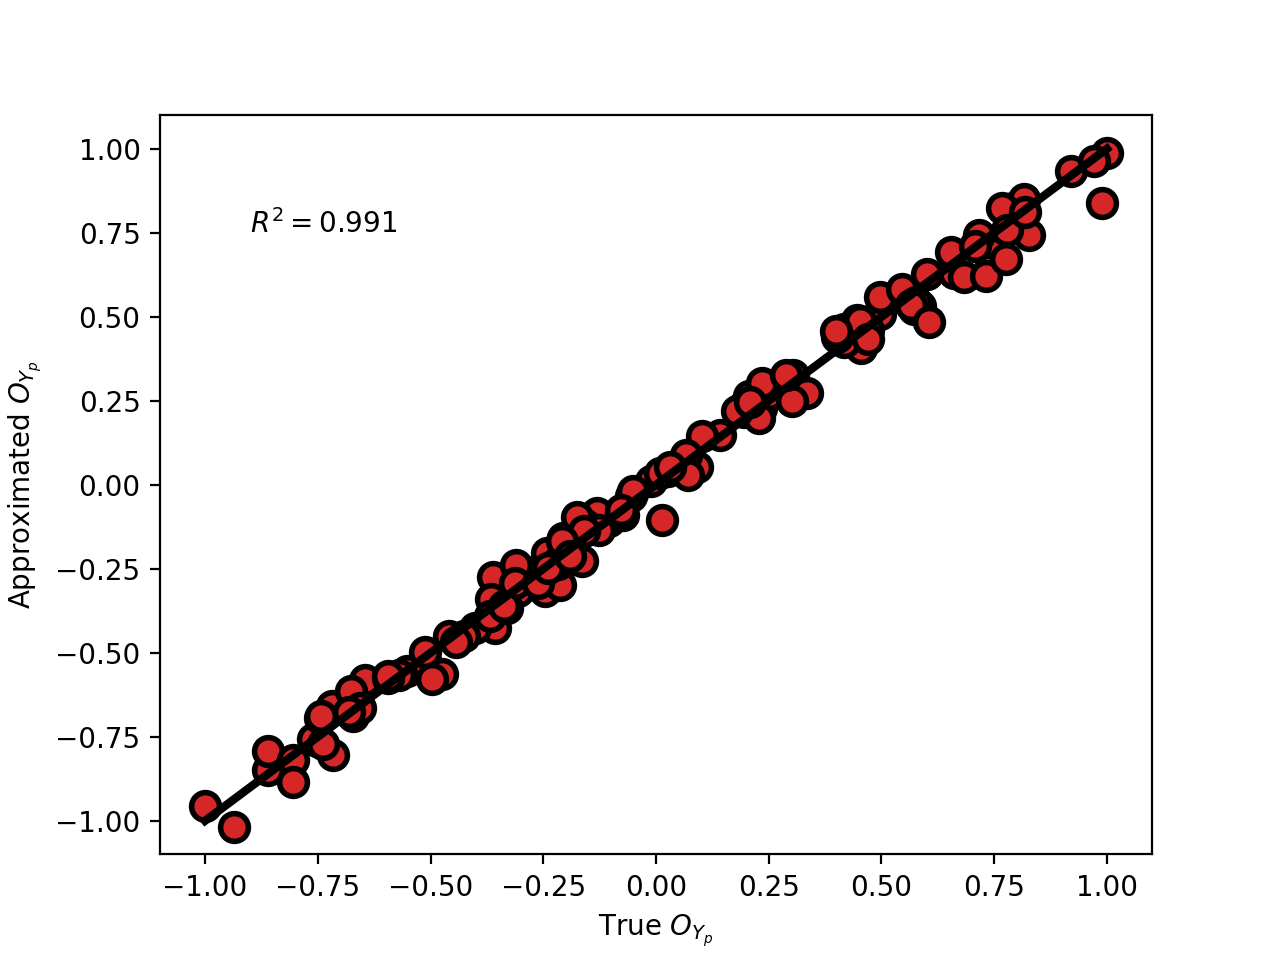

In [36]:
# Calculate R2 score
y1pred = subpoly1.get_polyfit(u1)
r2_score = score(y1pred,y1,metric='adjusted_r2',X=X)
print('R2 score = %.3f' %r2_score)

# Plot predicted versus actual y1
fig1, ax1 = plt.subplots()
ax1.plot(y1,y1pred,'C3o',ms=10,mec='k',mew=2)
ax1.set_xlim([-1.1,1.1])
ax1.set_ylim([-1.1,1.1])
ax1.plot([np.min(y1),np.max(y1)],[np.min(y1),np.max(y1)],'k-',lw=3)
ax1.annotate('$R^2 = %.3f$' %(r2_score), (-0.9,0.75))
ax1.set_xlabel('True $O_{Y_p}$')
ax1.set_ylabel('Approximated $O_{Y_p}$')
plt.show()

If we are happy with the quality of the obtained subspace, we can go ahead and generate a *sufficient summary plot*.

<IPython.core.display.Javascript object>


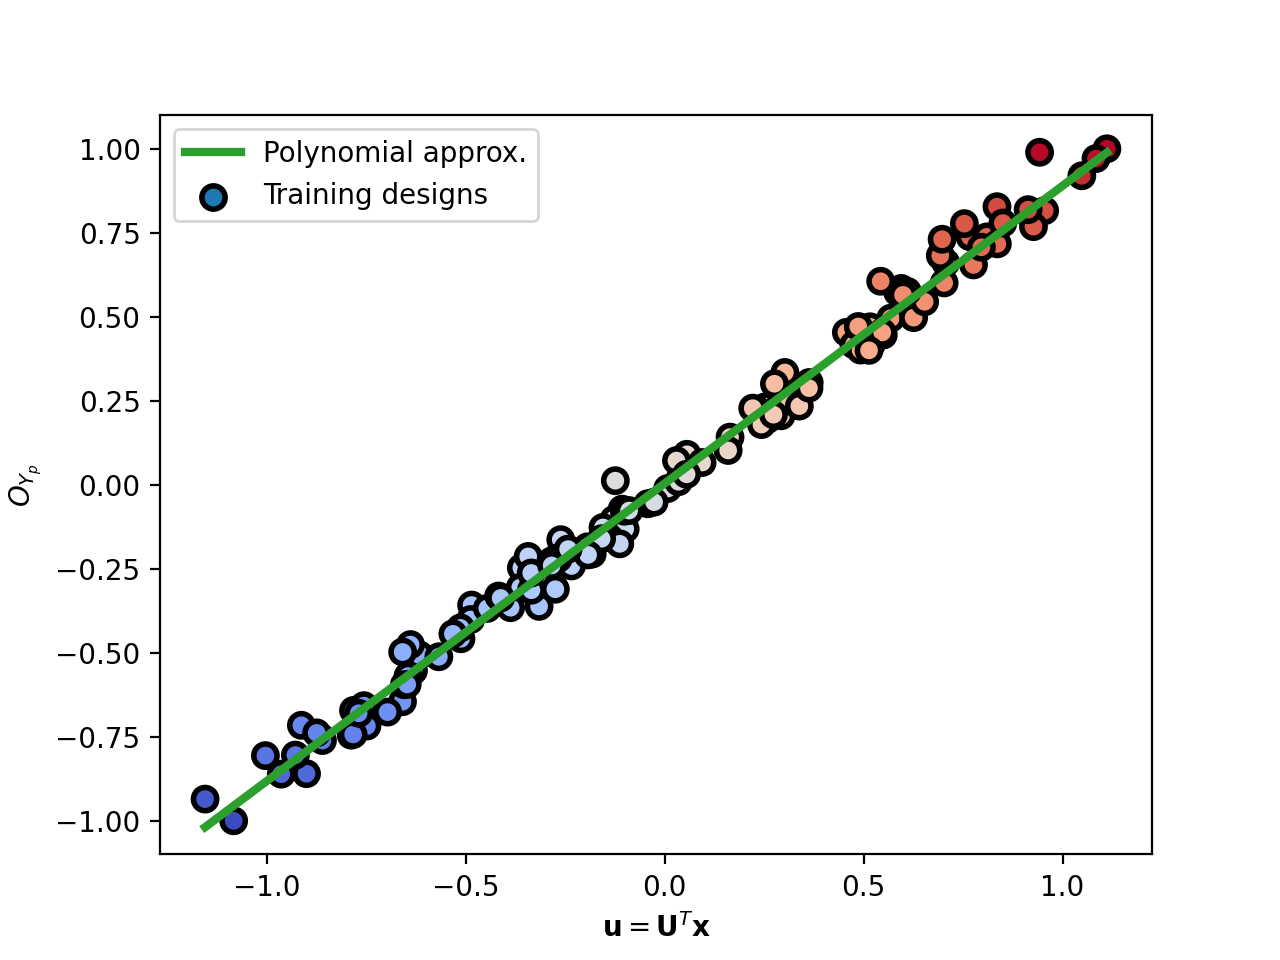

In [22]:
# Plot the sufficient summary plot for this subspace
fig2, ax2 = plt.subplots()
ax2.set_xlabel('$\mathbf{u}=\mathbf{U}^T\mathbf{x}$')
ax2.set_ylabel('$O_{Y_p}$')
s1_samples = np.linspace(np.min(u1[:,0]), np.max(u1[:,0]), 20)
PolyDiscreet = subpoly1.get_polyfit( s1_samples )
ax2.plot(s1_samples,PolyDiscreet,c='C2',lw=3,label='Polynomial approx.')
ax2.scatter(u1, y1, s=70, c=y1, marker='o',edgecolors='k',linewidths=2,cmap=cm.coolwarm,label='Training designs')
ax2.set_ylim([-1.1,1.1])
ax2.legend()
plt.show()

## Find a subspace for the recovery ratio gradient
Here we find a subspace for the recovery ratio gradient design objective $y_2$ ($O_{Rr}$ in the paper). From a previous grid search, we know a 2D subspace ($m=2$) and $3^{rd}$ order polynomial ($k=3$) are suitable.

**Note:** This one is trickier! You might need to rerun it a few times to get a good $R^2$ value. Remember to switch to `new=False` once you're happy with it!

In [59]:
m2 = 2 # number of reduced dimensions
k2 = 3 # polynomial order
new = False

# Load or find subspace
if new:
    # Find subspace via variable projection
    mysubspace2 = Subspaces(method='variable-projection',sample_points=X,
                            sample_outputs=y2,polynomial_degree=k2, subspace_dimension=m2)

    # Save to file 
    dump(mysubspace2,'Rr_subspace.joblib')
    
else:
    mysubspace2 = load('Rr_subspace.joblib')
    
# Get the subspace vector, and the polynomial approximation
W2 = mysubspace2.get_subspace()
active_subspace2 = W2[:,0:m2]
u2 = X @ active_subspace2
subpoly2 = mysubspace2.get_subspace_polynomial()

R2 score = 0.938


<IPython.core.display.Javascript object>


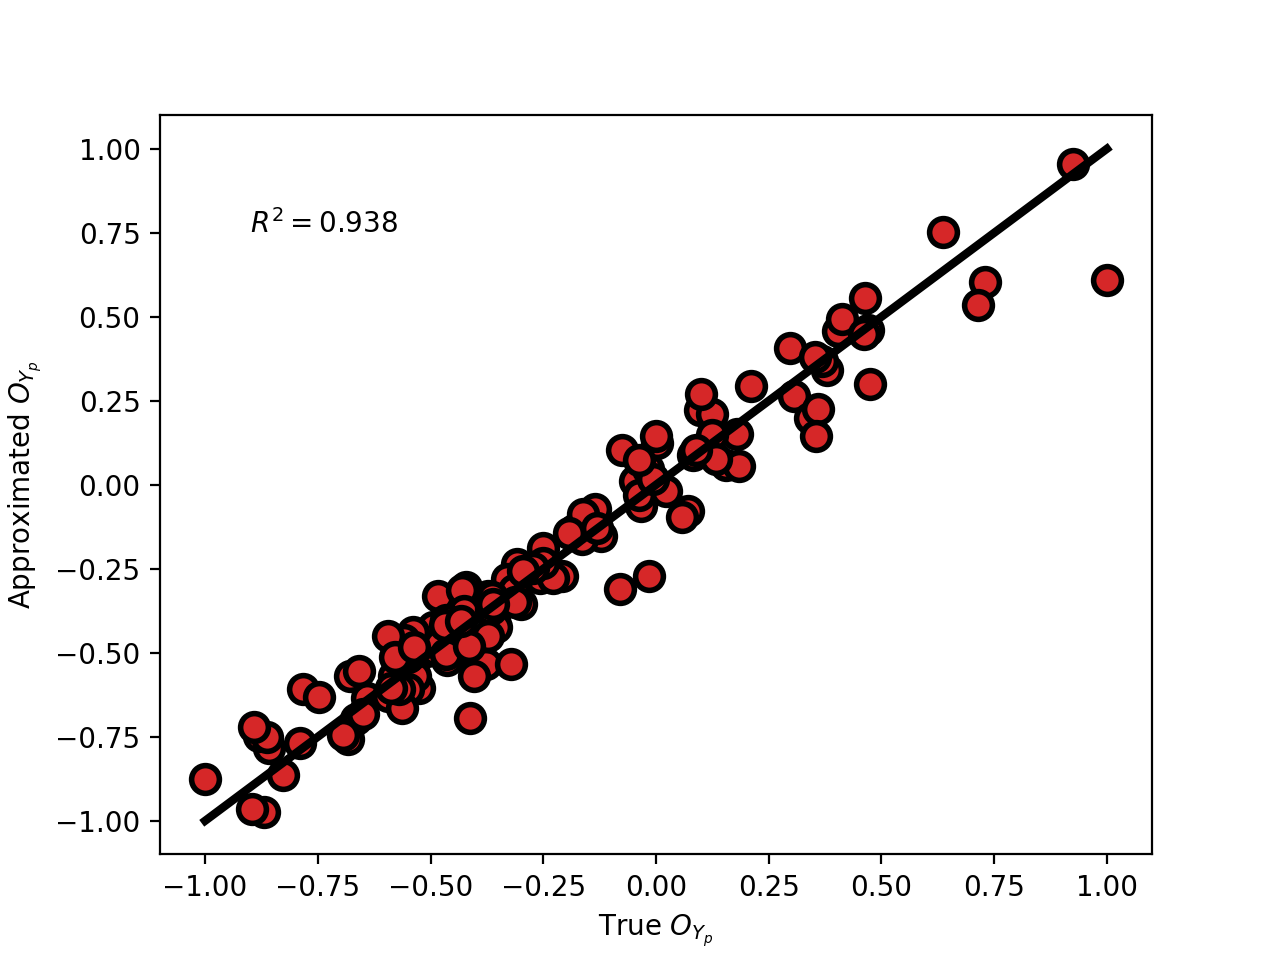

In [60]:
# Calculate R2 score
y2pred = subpoly2.get_polyfit(u2)
r2_score = score(y2pred,y2,metric='adjusted_r2',X=X)
print('R2 score = %.3f' %r2_score)

# Plot predicted versus actual y1
fig3, ax3 = plt.subplots()
ax3.plot(y2,y2pred,'C3o',ms=10,mec='k',mew=2)
ax3.set_xlim([-1.1,1.1])
ax3.set_ylim([-1.1,1.1])
ax3.plot([np.min(y2),np.max(y2)],[np.min(y2),np.max(y2)],'k-',lw=3)
ax3.annotate('$R^2 = %.3f$' %(r2_score), (-0.9,0.75))
ax3.set_xlabel('True $O_{Y_p}$')
ax3.set_ylabel('Approximated $O_{Y_p}$')
plt.show()

Now generate a *sufficient summary plot* again. This time its an exciting 2D one!

<IPython.core.display.Javascript object>


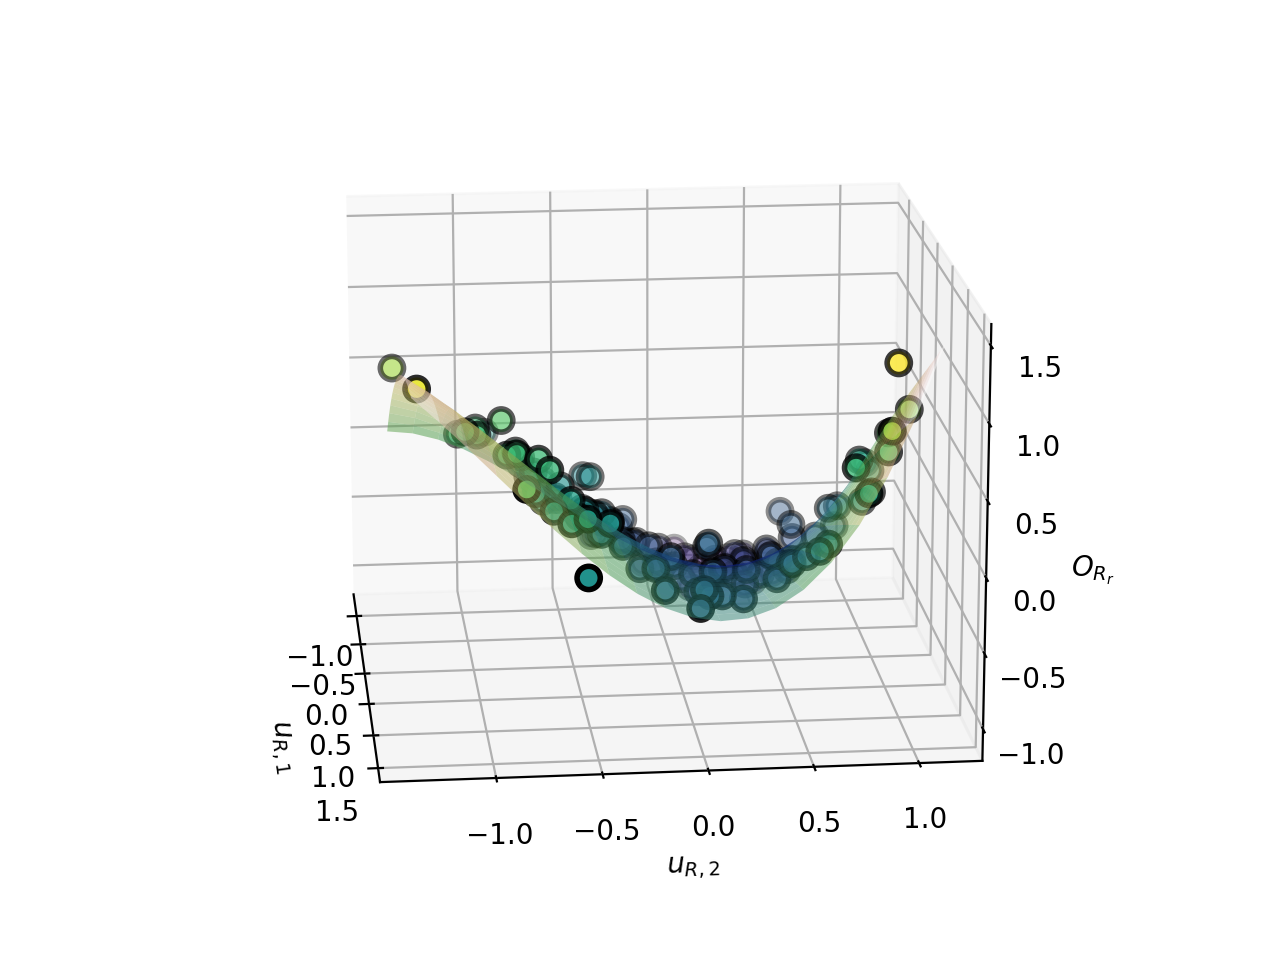

In [71]:
fig4 = plt.figure(tight_layout=True)
ax4 = fig4.add_subplot(111, projection='3d')
ax4.set_xlabel('$u_{R,1}$')
ax4.set_ylabel('$u_{R,2}$')
ax4.zaxis.set_rotate_label(False)
ax4.set_zlabel('$O_{R_r}$',rotation=0)

# Scatter plot of training points
ax4.scatter(u2[:,0], u2[:,1], y2,  s=70, c=y2, marker='o',edgecolors='k',linewidths=2)

# Plot the polynomial response surface
N = 20
s1_samples = np.linspace(np.min(u2[:,0]), np.max(u2[:,0]), N)
s2_samples = np.linspace(np.min(u2[:,1]), np.max(u2[:,1]), N)
[S1, S2] = np.meshgrid(s1_samples, s2_samples)
S1_vec = np.reshape(S1, (N*N, 1))
S2_vec = np.reshape(S2, (N*N, 1))
samples = np.hstack([S1_vec, S2_vec])
PolyDiscreet = subpoly2.get_polyfit( samples )
PolyDiscreet = np.reshape(PolyDiscreet, (N, N))
surf = ax4.plot_surface(S1, S2, PolyDiscreet, rstride=1, cstride=1, cmap=cm.gist_earth, linewidth=0, alpha=0.5)

## Find a subspace for the recovery ratio at Mach 0.8
The same techniques as above can be done to find a subspace for $y_3$. I'll leave this as "homework"!

You could also try to vary the hyper-parameters $k$ and $m$, and also try the `active-subspace` method instead of `variable-projection`.